<a href="https://colab.research.google.com/github/mishraraaj/Startup_funding_prediction/blob/main/Raj_Mishra_Startup_Funding_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/data_driven_investment_1.csv')

In [8]:
df.head()


,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502175 entries, 0 to 1502174
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500693 non-null  object 
 1   month                 1502175 non-null  int64  
 2   Application Category  1502175 non-null  object 
 3   Avg_Session_Time      877732 non-null   float64
 4   Business Models       2414 non-null     object 
 5   City                  2407 non-null     object 
 6   Company Stage         2414 non-null     object 
 7   Feed Name             2414 non-null     object 
 8   Founded Year          2414 non-null     float64
 9   Latest Funded Date    2414 non-null     object 
 10  MAU                   118087 non-null   float64
 11  Open_Rate             877715 non-null   float64
 12  Overview              2414 non-null     object 
 13  Practice Areas        2414 non-null     object 
 14  Reach                 1050875 non-

In [10]:
df.describe()

,month,Avg_Session_Time,Founded Year,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
count,1.502175e+06,877732.000000,2414.000000,118087.000000,877715.000000,1.050875e+06,2.255000e+03,877665.000000,352269.000000,1.502175e+06
mean,2.019719e+07,1.623425,2014.761806,0.398434,3.940650,1.067470e-03,7.730093e+07,5.963737,0.144645,1.607003e-03
std,5.532865e+03,2.253530,3.970991,0.208612,4.537119,1.690396e-02,3.259730e+08,9.593691,0.130948,4.005523e-02
min,2.018070e+07,0.000033,1983.000000,0.000019,1.000000,0.000000e+00,6.200000e+01,0.000033,0.000000,0.000000e+00
25%,2.019120e+07,0.417683,2014.000000,0.235294,1.875000,3.022203e-07,2.014807e+06,1.085473,0.056641,0.000000e+00
50%,2.020030e+07,0.889808,2016.000000,0.388769,2.933333,5.137744e-06,8.151818e+06,2.726575,0.107383,0.000000e+00
75%,2.020040e+07,1.917317,2017.000000,0.546218,4.500000,7.543001e-05,3.700000e+07,6.613983,0.190829,0.000000e+00
max,2.020060e+07,58.561333,2020.000000,1.000000,80.000000,9.990408e-01,7.201430e+09,149.983317,1.000000,1.000000e+00


0    1499761
1       2414
Name: funding_ind, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


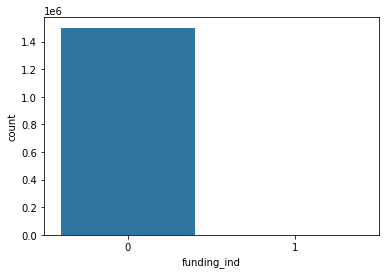

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df['funding_ind'].value_counts())
sns.countplot(df['funding_ind'])

In [12]:
plt.style.use('ggplot')

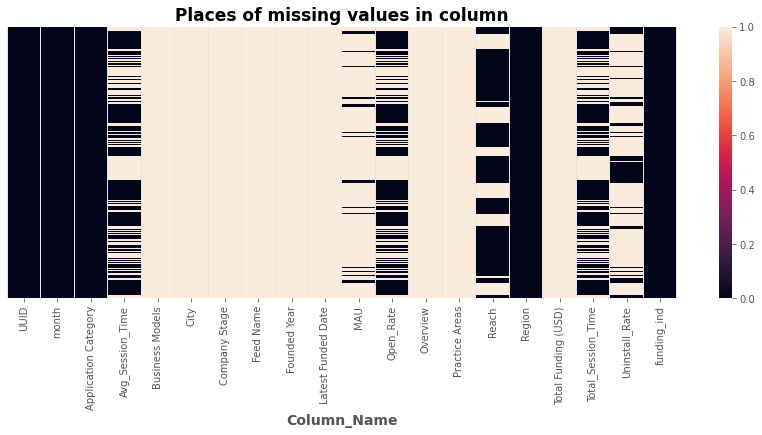

In [13]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

In [14]:
df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year',
       'Latest Funded Date', 'MAU', 'Open_Rate', 'Overview', 'Practice Areas',
       'Reach', 'Region', 'Total Funding (USD)', 'Total_Session_Time',
       'Uninstall_Rate', 'funding_ind'],
      dtype='object')

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


In [15]:
df['month'].value_counts()

20200301    291864
20200401    269271
20200601    163918
20200501    153682
20200201    104186
20200101    102074
20191201     96524
20191101     82189
20191001     16080
20190901     16080
20190801     16080
20190701     16080
20190601     15954
20190501     15803
20190401     15556
20190301     15266
20190201     14970
20190101     14719
20181201     14402
20181101     14142
20181001     13810
20180901     13539
20180801     13226
20180701     12760
Name: month, dtype: int64

In [16]:
df['month'].max()

20200601

In [17]:
df['month'].min()

20180701

In [18]:
df["UUID"].value_counts().shape

(147741,)

In [19]:
df["Application Category"].value_counts()

Education                  202514
Tools                      139262
Business                    87780
Books & Reference           85189
Entertainment               76582
Productivity                63135
Personalization             62694
Finance                     60828
Photography                 56762
Music & Audio               55885
Lifestyle                   53462
Social                      38896
Communication               37143
Travel & Local              37100
Health & Fitness            36996
Shopping                    31776
Simulation                  29967
News & Magazines            27598
Casual                      25771
Action                      24972
Video Players & Editors     24309
Puzzle                      24304
Sports                      20217
Arcade                      18639
Medical                     17691
Educational                 14675
Food & Drink                14230
Maps & Navigation           14028
Racing                      13608
Adventure     

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


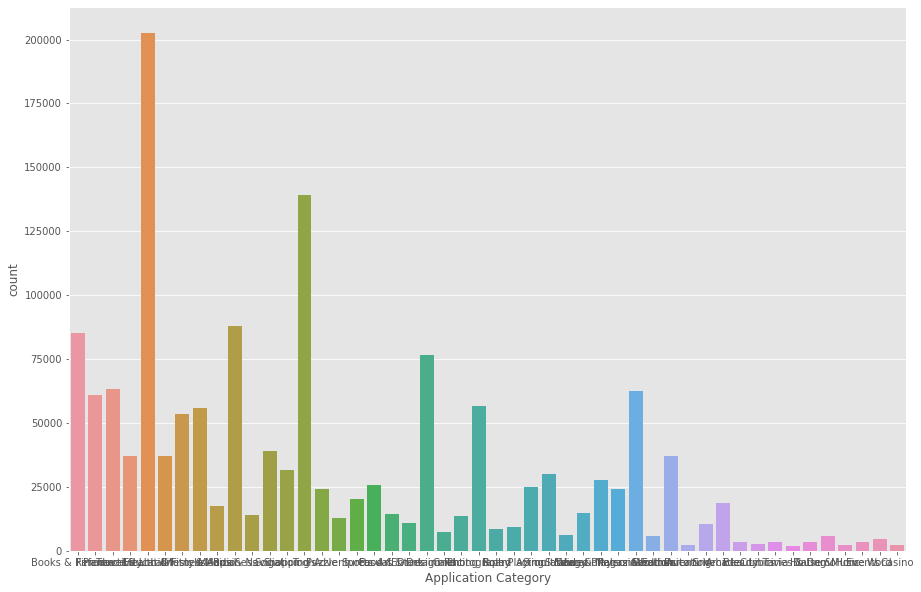

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(df["Application Category"])

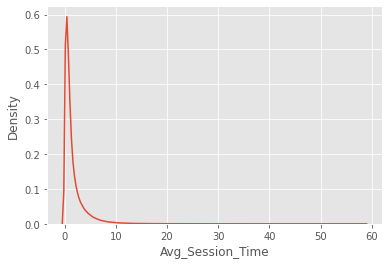

In [21]:
sns.kdeplot(df['Avg_Session_Time'].dropna())

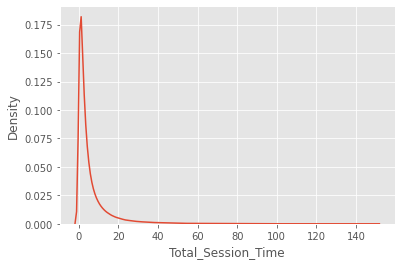

In [22]:
sns.kdeplot(df['Total_Session_Time'])

In [23]:
a=list(set(df[df['funding_ind']==0]['UUID'])|set(df[df['funding_ind']==1]['UUID']))

In [24]:
Funded_df=df[df['funding_ind']==1]

In [25]:
Funded_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,National,4087427.0,NaN,0.250000,1
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1
2624,9d17e60de4c6bb504d258872b6cc0bffd09de171,20180801,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,National,1156045.0,NaN,NaN,1
3374,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,20180801,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,National,34444.0,NaN,0.100000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500587,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000074,National,14634837.0,NaN,0.078947,1
1500588,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000105,National,14634837.0,NaN,0.102041,1
1500589,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000061,National,14634837.0,NaN,0.114286,1
1500590,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000365,National,14634837.0,NaN,0.077348,1


month


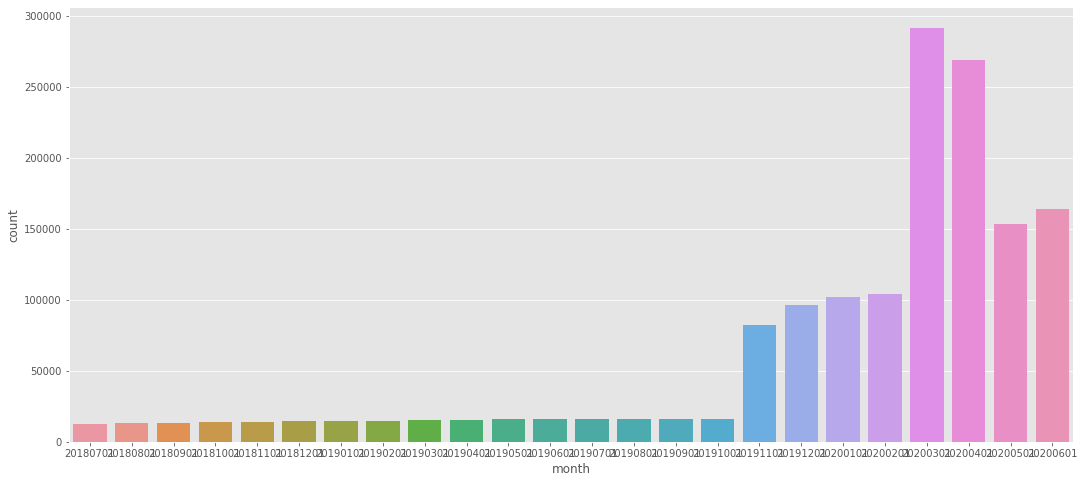

Application Category


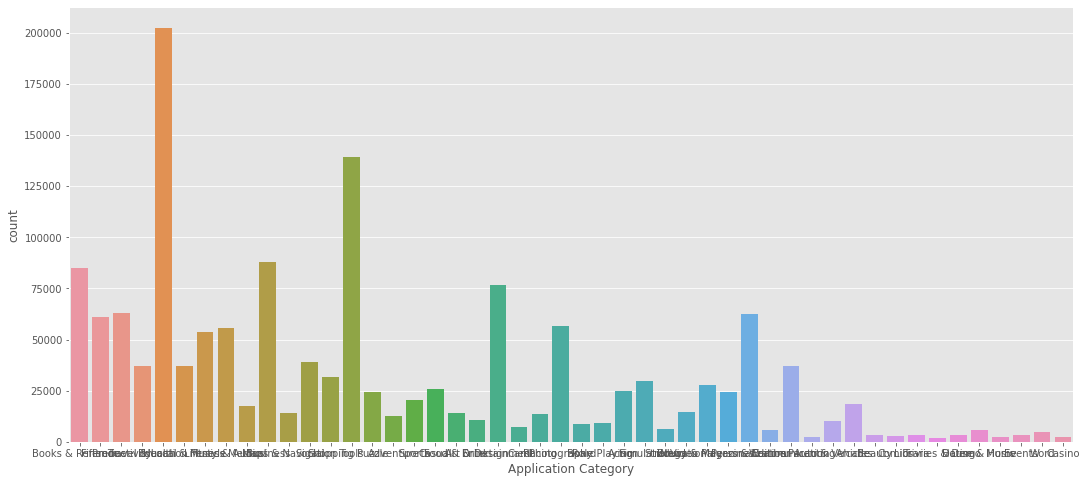

City


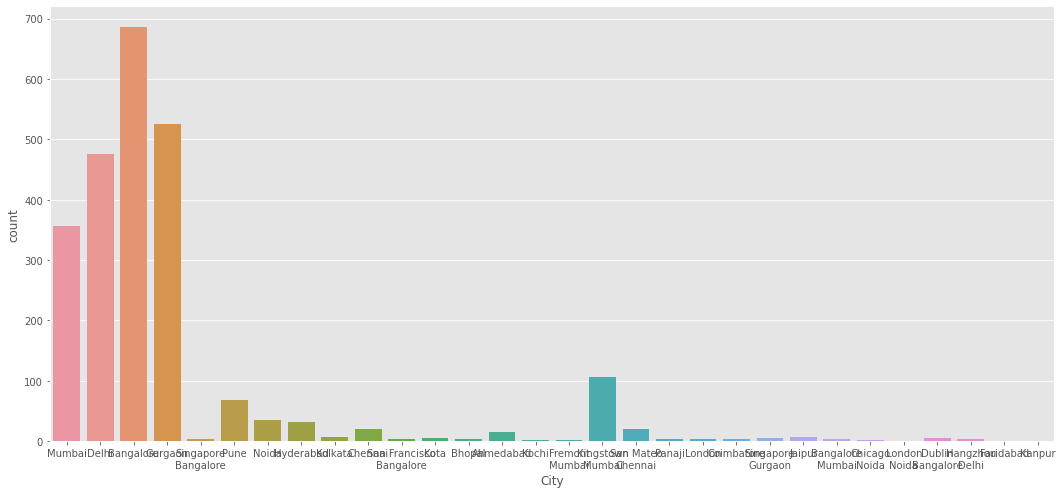

Company Stage


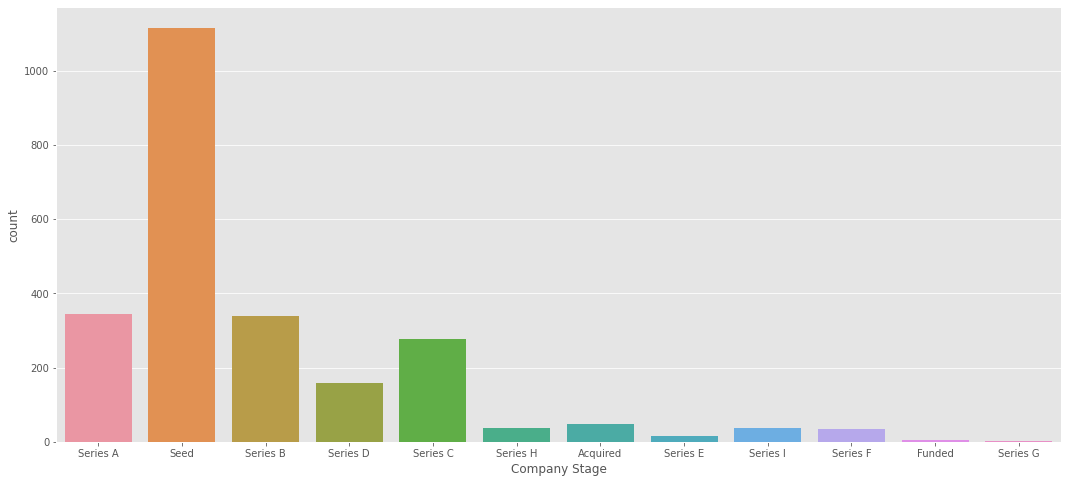

Founded Year


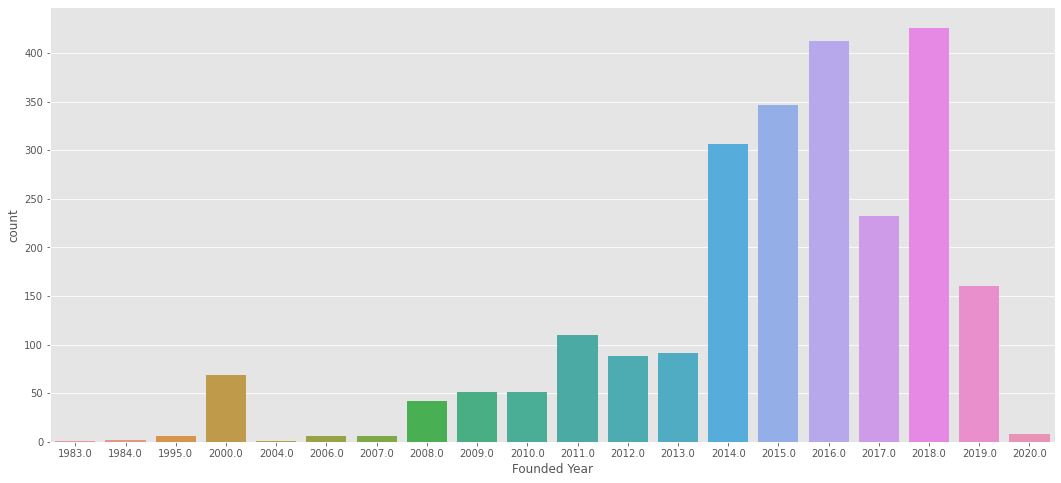

funding_ind


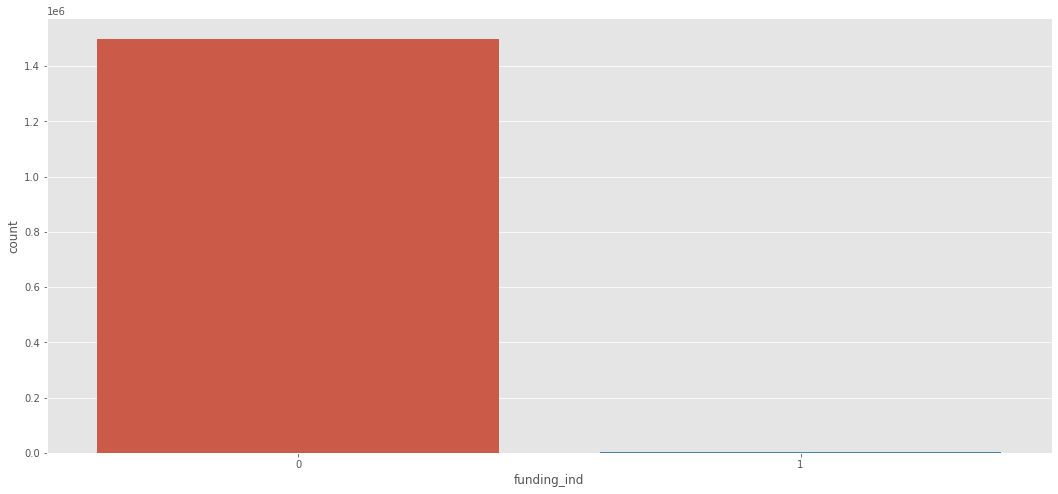

In [26]:
for column in df.columns:
  if df[column].nunique() > 1:
    if df[column].nunique() < 100:
        print(column)
        plt.figure(figsize=(18,8)) 
        sns.countplot(x=column,data=df)
        #plt.legend()
        plt.show()

In [27]:
df['month']=pd.to_datetime(df['month'],format='%Y%m%d')

In [28]:
df['Founded Year']=pd.to_datetime(df['Founded Year'],format='%Y').dropna()

In [29]:
df['Latest Funded Date']=pd.to_datetime(df['Latest Funded Date'],format='%Y-%m-%d').dropna()


To make the Indepe

In [30]:
df[(df["UUID"].isna()) & (df['funding_ind']==0)].head()


,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
647,NaN,2018-08-01,Tools,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.000158,National,NaN,NaN,0.160000,0
2210,NaN,2018-08-01,Action,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.000056,National,NaN,NaN,0.714286,0
4033,NaN,2018-08-01,Photography,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.001433,National,NaN,NaN,0.000000,0
5907,NaN,2018-08-01,Auto & Vehicles,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.000021,National,NaN,NaN,NaN,0
6074,NaN,2018-08-01,Business,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0.000864,National,NaN,NaN,0.116788,0


In [31]:
df[(df["UUID"].isna()) & (df['funding_ind']==1)].head()


,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind


There are nearly 1400 data points with missing UUID value. so we cannot impute any value for these we have to drop.

In [32]:
df=df[~df["UUID"].isna()]

In [33]:
df["UUID"].unique()

array(['c1ad38e2d357610c129657d870ede902e8abfcb9',
       'd841e670d9191f896a0cbc75961920887b375756',
       '0a59d138b3eaccd22b665eae70c756fef83ddb63', ...,
       'edcbe5f1ad6b3c0400e60d38a07a5cdaabc4b1a8',
       'e9f9a92b05dbb720db6d49a85b2ed243fe373ccd',
       '6495e1a3ddf8ac88f119ba60eb5880da263d588c'], dtype=object)

In [34]:
grouped=df.groupby("UUID",sort=True)

In [35]:
grouped_df=grouped.mean()
grouped_df["UUID"]=grouped_df.index
grouped_df.index=range(len(grouped_df))


In [36]:
grouped_df.head()

,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,UUID
0,NaN,NaN,NaN,1.396504e-06,NaN,NaN,NaN,0.0,000066f130e3b972364c505c805e2cddee68816d
1,NaN,NaN,NaN,3.022203e-07,NaN,NaN,NaN,0.0,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b
2,0.978822,NaN,2.0,7.147993e-06,NaN,2.449867,NaN,0.0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3
3,0.277208,NaN,1.5,2.497145e-07,NaN,0.372308,NaN,0.0,000127cbe70aeeab81734b68f409176bd1f1fde8
4,NaN,NaN,NaN,1.972088e-07,NaN,NaN,NaN,0.0,00017d2a013dc43f0e34de1be4beca443713ec80


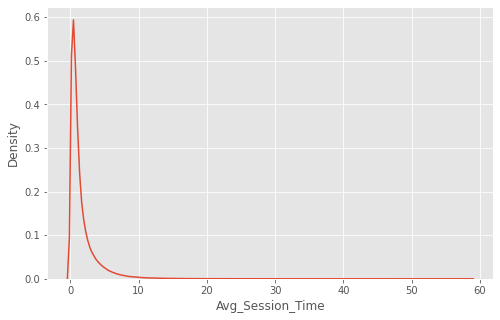

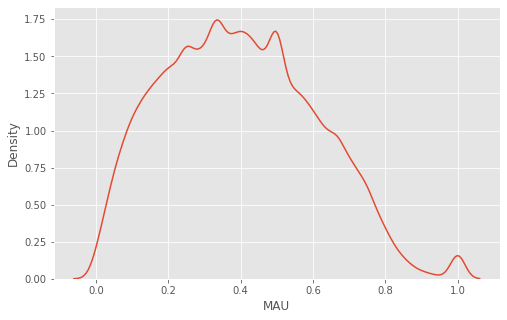

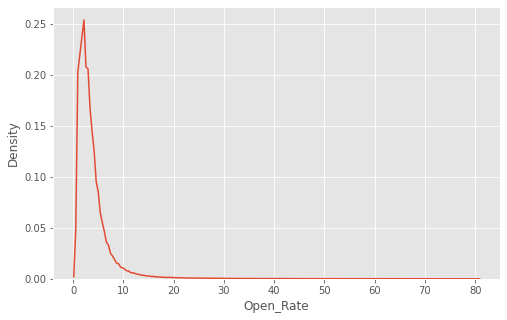

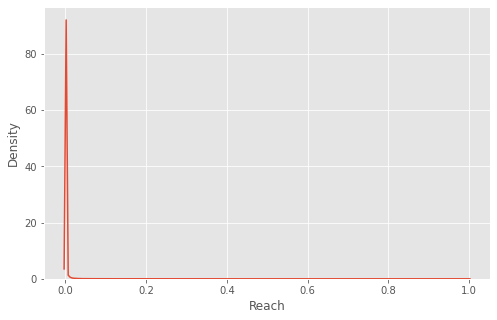

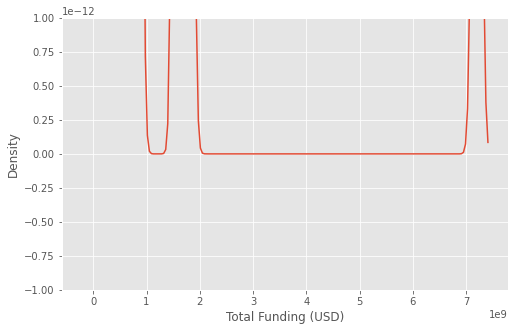

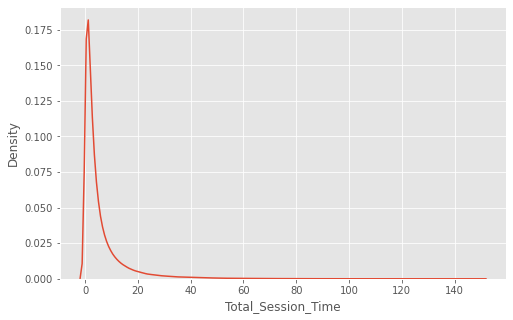

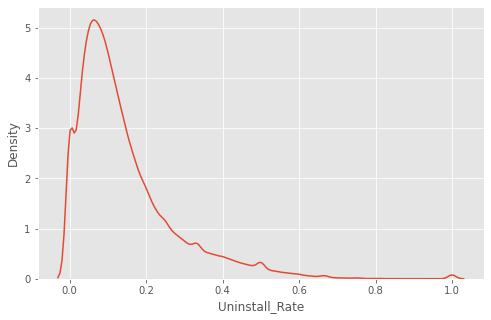

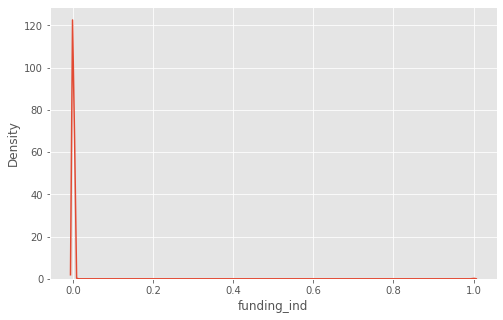

In [37]:
plt.rcParams['figure.figsize'] = (8, 5)
rgb_values = sns.color_palette("Set1", 9)
# Map continents to the colors
numerical_features=grouped_df.describe().columns

for col in numerical_features:
  plt.figure()
  sns.kdeplot(df[col])

In [38]:
grouped_df[grouped_df['funding_ind']==1]

,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,UUID
8766,NaN,NaN,NaN,1.972088e-07,6014060.0,NaN,NaN,1.0,0f6f58df028acaf2712ba187680130ba84c7669f
10419,NaN,NaN,NaN,4.008247e-07,NaN,NaN,NaN,1.0,125191a04ae5c50b08fff009a5be4a803011d144
13127,NaN,NaN,NaN,4.469234e-07,NaN,NaN,NaN,1.0,171cbf6b8fb2fee00a0e1a0ac16539cb120d2e30
25208,NaN,NaN,NaN,4.469234e-07,1928674.0,NaN,NaN,1.0,2bf786029e6df33f6e840c351560db0550da0ecd
28188,NaN,NaN,NaN,1.972088e-07,NaN,NaN,NaN,1.0,3121def4df2090828ca11cc6b630bd69b6fcafdf
38314,NaN,NaN,NaN,1.972088e-07,NaN,NaN,NaN,1.0,4287e7bbe58086fc5643f3b248fe73de85e9114f
59895,NaN,NaN,NaN,3.022203e-07,NaN,NaN,NaN,1.0,67f7e338ad743ee393a54eceaf882d05fecf717b
62751,NaN,NaN,NaN,1.972088e-07,NaN,NaN,NaN,1.0,6cf6760228422d7fbb08d774a7e2ea5cbf2cf33e
84821,NaN,NaN,NaN,1.972088e-07,4000000.0,NaN,NaN,1.0,937d7c6eb4af7ea0caad34bb65631b93a200d17d
92404,NaN,NaN,NaN,3.022203e-07,74127145.0,NaN,NaN,1.0,a073f99bd204b42471401082937b93c1916d1c2e


In [39]:
random_var=df[df["UUID"]=='4f765967ae5af21b3b308d8f24859154856f6e39']

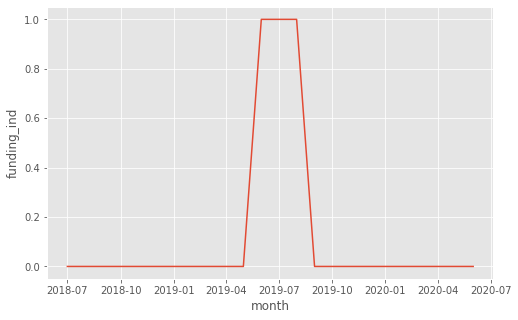

In [40]:
sns.lineplot(data=random_var,x='month',y='funding_ind')

Visualisation for 10 funded start ups

In [41]:
lis_uuid=df[df['funding_ind']==1][:10]['UUID'].to_list()

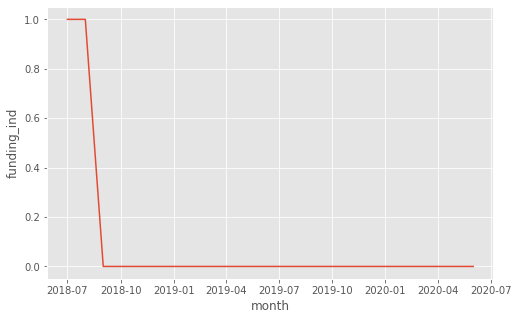

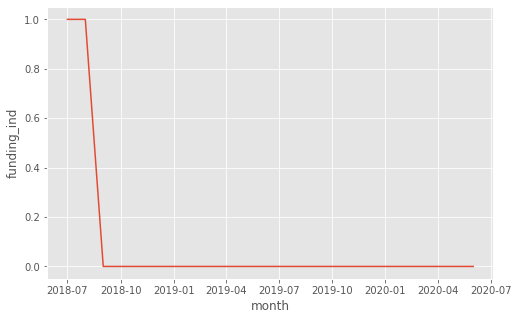

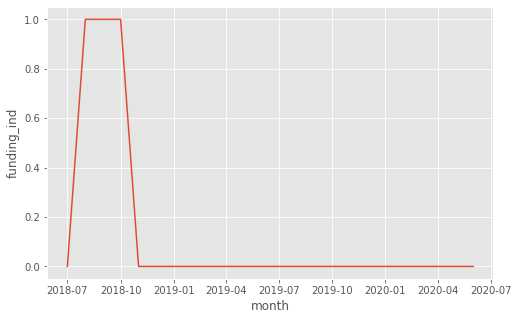

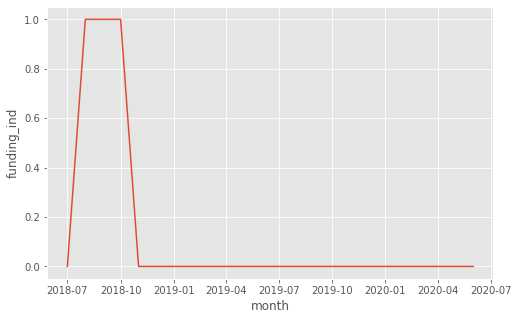

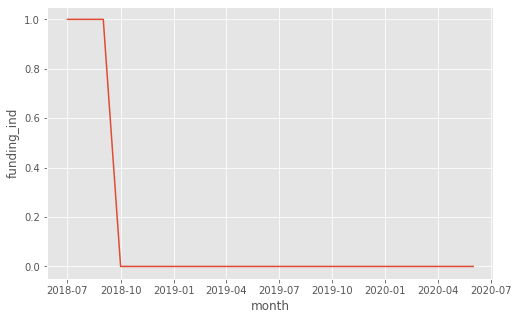

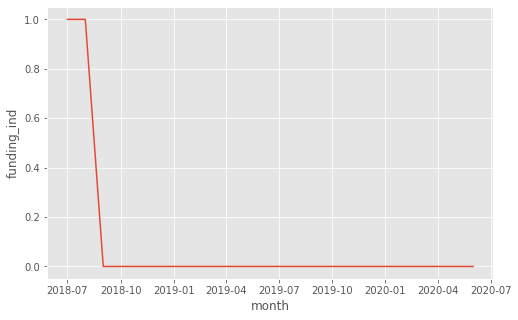

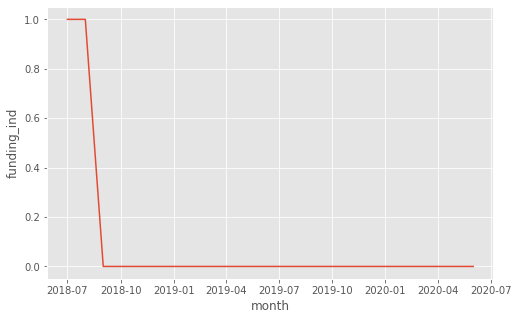

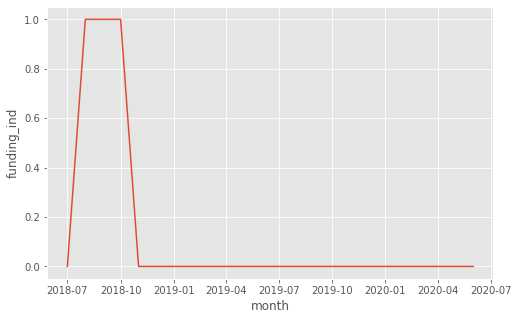

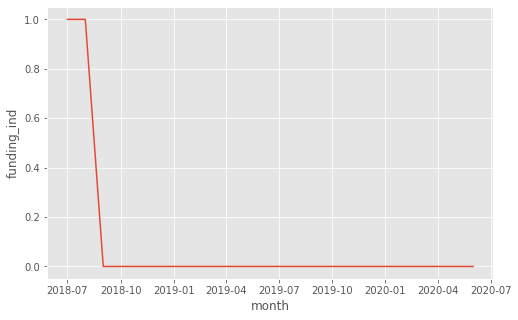

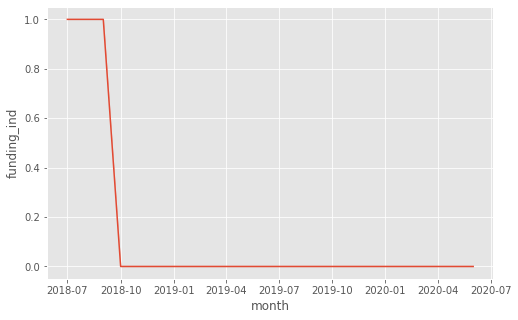

In [42]:
for id in lis_uuid:
    random_var=df[df["UUID"]==id]
    sns.lineplot(data=random_var,x='month',y='funding_ind')
    plt.show()

Funding indicator is with respect to few month only hard to interpret what it meaan since it is 1 for few month and then again 0

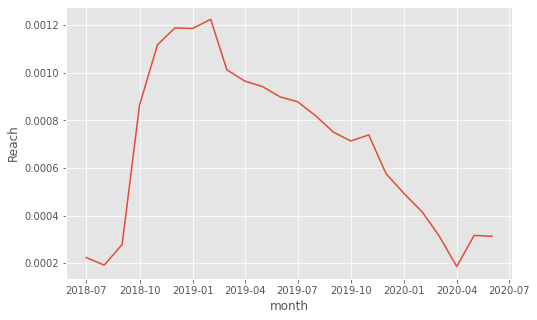

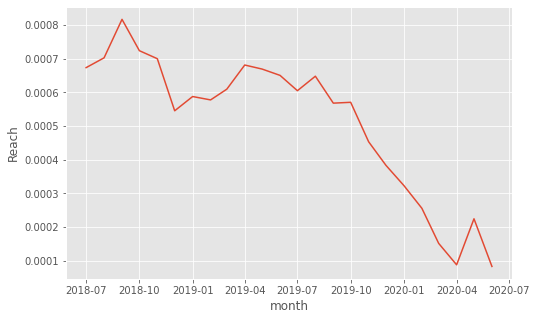

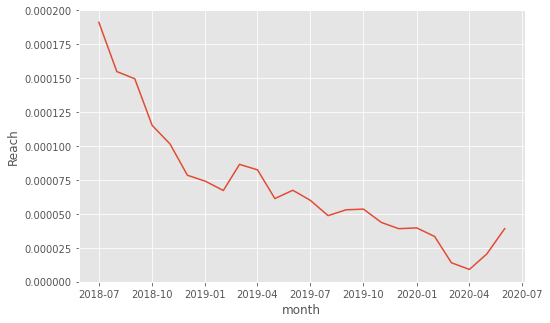

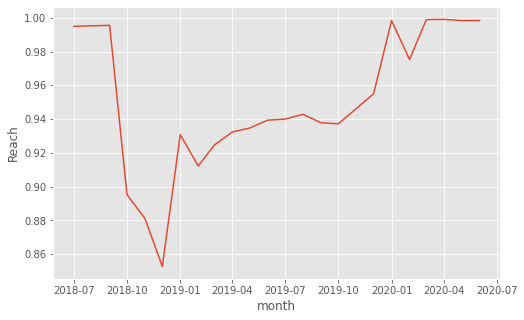

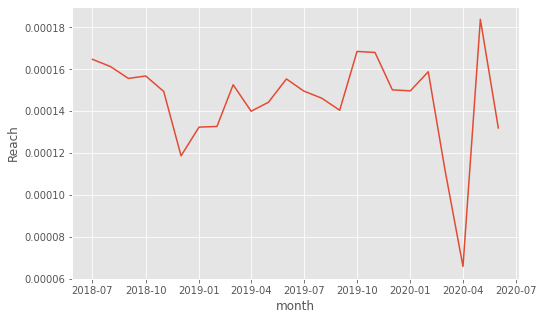

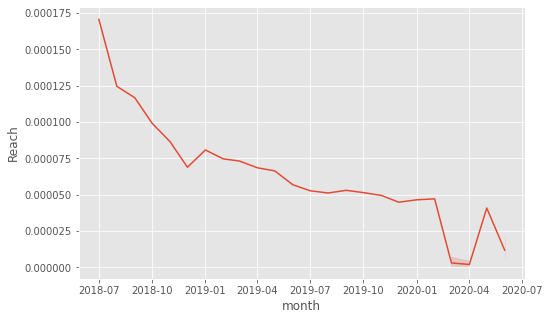

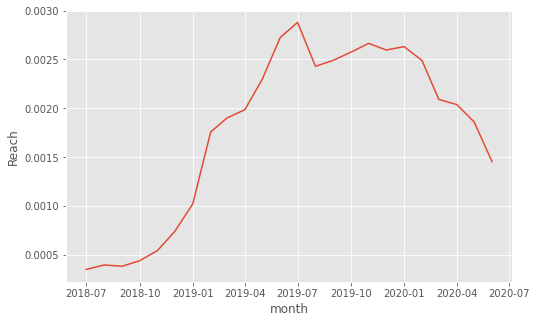

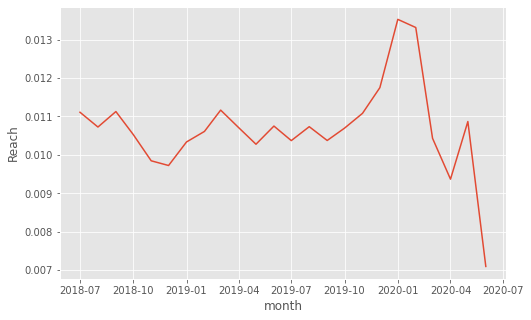

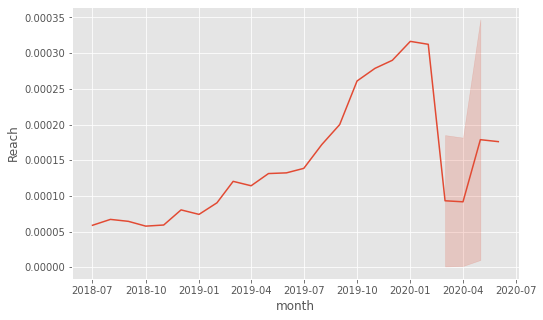

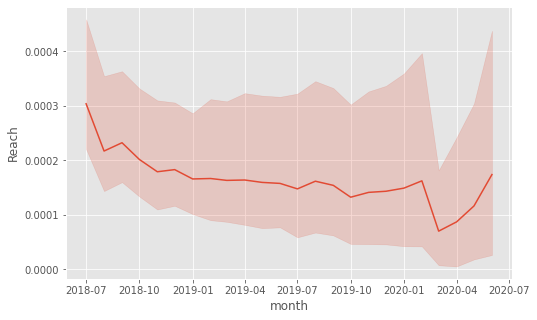

In [43]:
for id in lis_uuid:
    random_var=df[df["UUID"]==id]
    sns.lineplot(data=random_var,x='month',y='Reach')
    plt.show()

REach of any application is a good predictor for any investment


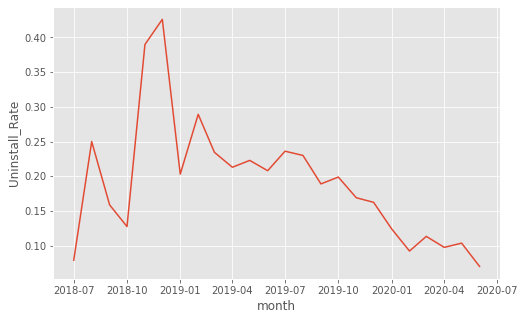

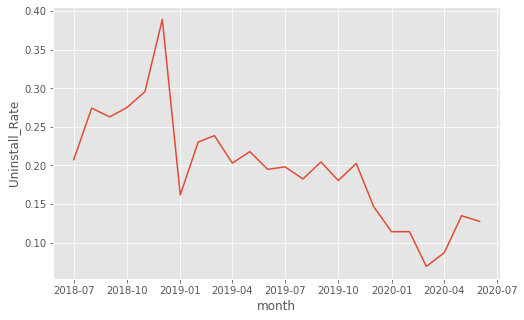

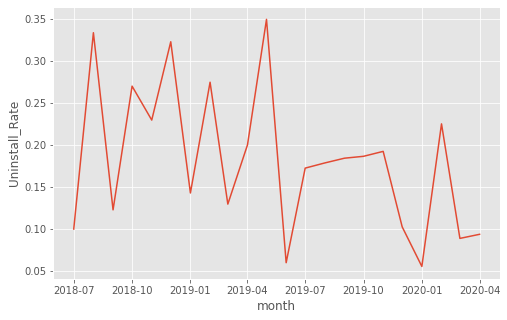

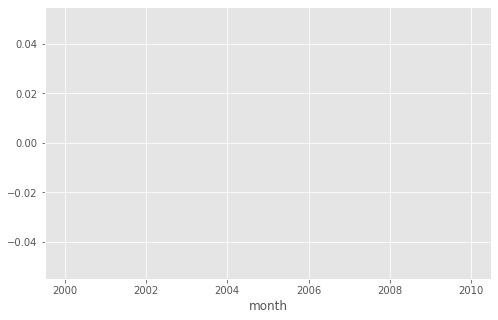

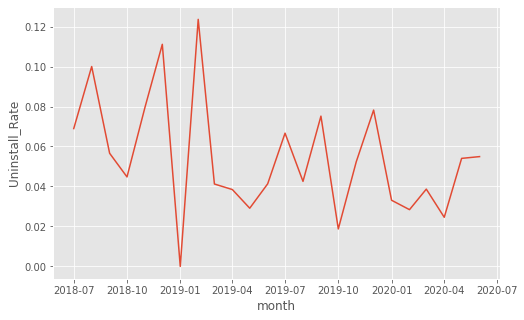

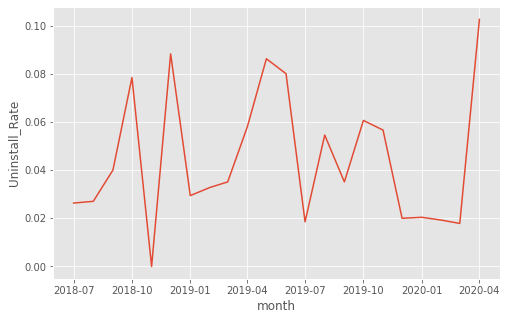

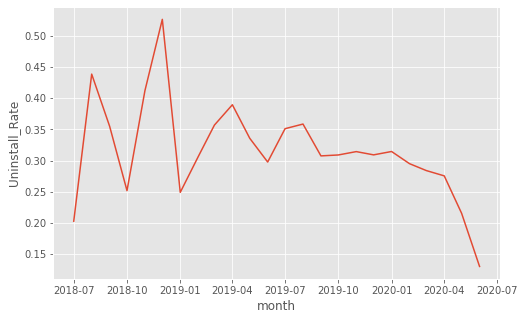

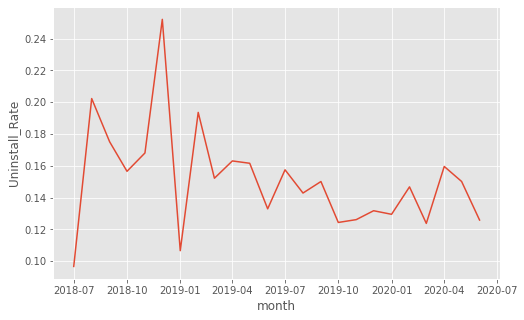

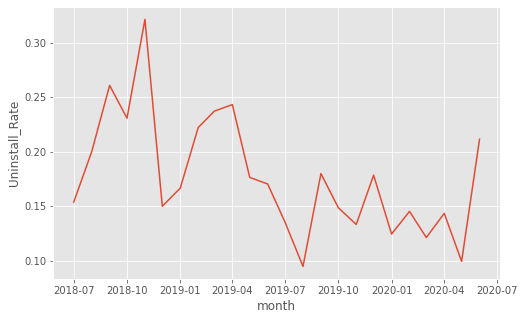

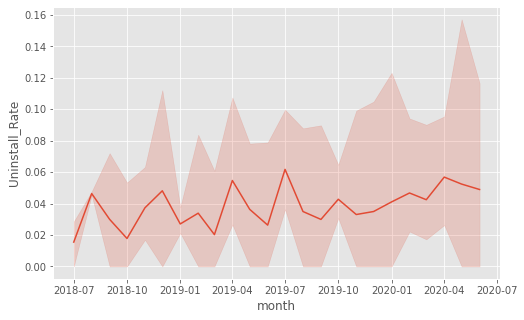

In [44]:
for id in lis_uuid:
    random_var=df[df["UUID"]==id]
    sns.lineplot(data=random_var,x='month',y='Uninstall_Rate')
    plt.show()

Contains only One Value.

In [45]:
df=df.drop(columns=['Region'])

In [46]:
set(df.columns.to_list())-set(grouped_df.columns.to_list())

{'Application Category',
 'Business Models',
 'City',
 'Company Stage',
 'Feed Name',
 'Founded Year',
 'Latest Funded Date',
 'Overview',
 'Practice Areas',
 'month'}

In [47]:
aver_list=['Avg_Session_Time', 'MAU', 'Open_Rate', 'Reach', 'Total Funding (USD)',
       'Total_Session_Time', 'Uninstall_Rate', 'funding_ind']

In [48]:
from scipy import stats


In [49]:
def ffbf(x):
    return x.interpolate().ffill().bfill()

In [50]:
df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year',
       'Latest Funded Date', 'MAU', 'Open_Rate', 'Overview', 'Practice Areas',
       'Reach', 'Total Funding (USD)', 'Total_Session_Time', 'Uninstall_Rate',
       'funding_ind'],
      dtype='object')

In [51]:
grouped_df=df.groupby("UUID").agg(list)

In [52]:
grouped_df

,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
UUID,,,,,,,,,,,,,,,,,,
000066f130e3b972364c505c805e2cddee68816d,"[2020-03-01 00:00:00, 2020-03-01 00:00:00, 202...","[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]"
0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,[2020-04-01 00:00:00],[Finance],[nan],[nan],[nan],[nan],[nan],[NaT],[NaT],[nan],[nan],[nan],[nan],[3.022202611485277e-07],[nan],[nan],[nan],[0]
0000d19d56df9df1f266fc1fd245a37ff27fb1f3,"[2020-03-01 00:00:00, 2020-02-01 00:00:00, 202...","[Social, Social, Social, Social, Social]","[nan, 1.4710444444444446, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[NaT, NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT, NaT]","[nan, nan, nan, nan, nan]","[nan, 3.0, 1.0, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[2.3665058954592075e-06, nan, 4.88937782667155...","[nan, nan, nan, nan, nan]","[nan, 4.413133333333334, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]"
000127cbe70aeeab81734b68f409176bd1f1fde8,"[2020-03-01 00:00:00, 2020-05-01 00:00:00, 202...","[Personalization, Personalization, Personaliza...","[0.1902, 0.3642166666666667, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[NaT, NaT, NaT]","[NaT, NaT, NaT]","[nan, nan, nan]","[2.0, 1.0, nan]","[nan, nan, nan]","[nan, nan, nan]","[1.9720882462160069e-07, nan, 3.02220261148527...","[nan, nan, nan]","[0.3804, 0.3642166666666667, nan]","[nan, nan, nan]","[0, 0, 0]"
00017d2a013dc43f0e34de1be4beca443713ec80,[2020-03-01 00:00:00],[Shopping],[nan],[nan],[nan],[nan],[nan],[NaT],[NaT],[nan],[nan],[nan],[nan],[1.9720882462160069e-07],[nan],[nan],[nan],[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe942f59aaf6d4a4119f1538cda1e4e69e9d8d,"[2019-12-01 00:00:00, 2020-03-01 00:00:00, 202...","[Tools, Tools, Tools, Tools, Tools]","[0.3578083333333332, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[NaT, NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT, NaT]","[nan, nan, nan, nan, nan]","[2.0, nan, 1.0, 1.0, 2.0]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, 5.916264738648019e-07, 4.889377826671556...","[nan, nan, nan, nan, nan]","[0.7156166666666669, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]"
ffff383fa0831aa6d2c5d9257194d0d89841422d,"[2020-03-01 00:00:00, 2020-03-01 00:00:00, 202...","[Card, Card, Card, Card, Card, Card, Card, Car...","[13.552092152777774, 2.9301666666666666, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, ...","[NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.55, 1.0, nan, 1.3205128205128205, 2.0327868...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.916264738648019e-07, 5.916264738648019e-07,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[34.25681208333334, 2.9301666666666666, nan, 1...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
ffff67b9dfc65a5f1f146d68

In [53]:
import numpy as np


In [54]:
 lst_col='month'
 pd.DataFrame({ col:np.repeat(grouped_df[col].values, grouped_df[lst_col].str.len())
                 for col in grouped_df.columns.drop(lst_col) } )

,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,"[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]"
1,"[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]"
2,"[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]"
3,"[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[NaT, NaT, NaT, NaT]","[NaT, NaT, NaT, NaT]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]"
4,[Finance],[nan],[nan],[nan],[nan],[nan],[NaT],[NaT],[nan],[nan],[nan],[nan],[3.022202611485277e-07],[nan],[nan],[nan],[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500688,"[Finance, Finance]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[NaT, NaT]","[NaT, NaT]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[3.022202611485277e-07, 9.066607834455828e-07]","[nan, nan]","[nan, nan]","[nan, nan]","[0, 0]"
1500689,"[Finance, Finance]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[NaT, NaT]","[NaT, NaT]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[3.022202611485277e-07, 9.066607834455828e-07]","[nan, nan]","[nan, nan]","[nan, nan]","[0, 0]"
1500690,"[Casual, Casual, Casual]","[nan, 0.062116666666666674, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[NaT, NaT, NaT]","[NaT, NaT, NaT]","[nan, nan, nan]","[nan, 1.0, nan]","[nan, nan, nan]","[nan, nan, nan]","[1.9720882462160069e-07, nan, 3.02220261148527...","[nan, nan, nan]","[nan, 0.062116666666666674, nan]","[nan, nan, nan]","[0, 0, 0]"
1500691,"[Casual, Casual, Casual]","[nan, 0.062116666666666674, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[NaT, NaT, NaT]","[NaT, NaT, NaT]","[nan, nan, nan]","[nan, 1.0, nan]","[nan, nan, nan]","[nan, nan, nan]","[1.9720882462160069e-07, nan, 3.02220261148527...","[nan, nan, nan]","[nan, 0.062116666666666674, nan]","[nan, nan, nan]","[0, 0, 0]"


In [55]:
import datetime

In [56]:
df['Latest Funded Date'].dropna()

147       2018-09-10
212       2018-09-19
2324      2018-11-19
2624      2018-11-01
3374      2018-10-01
             ...    
1500587   2019-03-30
1500588   2019-03-30
1500589   2019-03-30
1500590   2019-03-30
1501153   2019-03-06
Name: Latest Funded Date, Length: 2414, dtype: datetime64[ns]

In [57]:
grouped=df.groupby("UUID").apply(lambda x: x.interpolate(method='index').ffill().bfill())

In [58]:
grouped=grouped.loc[:,grouped.isna().mean()<0.9]

Redundant Column

In [59]:
aggregated_df=df.pivot_table(index=["UUID","Application Category",'month'],aggfunc=np.median).interpolate().ffill().bfill()

In [60]:
aggregated_df=aggregated_df.reset_index()


In [61]:
aggregated_df

,UUID,Application Category,month,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,000066f130e3b972364c505c805e2cddee68816d,Business,2020-03-01,1.471044,0.475634,3.0,1.972088e-07,1410068.0,4.413133,0.026207,0
1,000066f130e3b972364c505c805e2cddee68816d,Business,2020-04-01,1.471044,0.475634,3.0,3.022203e-07,1410068.0,4.413133,0.026207,0
2,000066f130e3b972364c505c805e2cddee68816d,Business,2020-06-01,1.471044,0.475634,3.0,4.889378e-06,1410068.0,4.413133,0.026207,0
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,2020-04-01,1.471044,0.475634,3.0,3.022203e-07,1410068.0,4.413133,0.026207,0
4,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2020-02-01,1.471044,0.475634,3.0,1.334363e-06,1410068.0,4.413133,0.026207,0
...,...,...,...,...,...,...,...,...,...,...,...
945179,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,2020-06-01,1.516300,0.666667,1.0,5.037004e-07,47422120.0,1.516300,0.025641,0
945180,ffff74dbc24df592b6355be32f5a71adeefb3b48,Finance,2020-04-01,0.789208,0.666667,1.0,6.044405e-07,47422120.0,0.789208,0.025641,0
945181,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,Casual,2020-02-01,0.062117,0.666667,1.0,4.008247e-07,47422120.0,0.062117,0.025641,0
945182,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,Casual,2020-03-01,0.062117,0.666667,1.0,1.972088e-07,47422120.0,0.062117,0.025641,0


In [62]:
companies_funded=aggregated_df[aggregated_df['funding_ind']==1]['UUID'].unique()

In [63]:
for elem in ['UUID', 'Avg_Session_Time', 'Open_Rate', 'Reach','Total_Session_Time','Total Funding (USD)','Uninstall_Rate']:
  aggregated_df[f'{elem}_3']=aggregated_df[elem].shift(periods=3)
  aggregated_df[f'{elem}_2']=aggregated_df[elem].shift(periods=2)
  aggregated_df[f'{elem}_1']=aggregated_df[elem].shift(periods=1)

In [64]:
aggregated_df

,UUID,Application Category,month,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,UUID_3,UUID_2,UUID_1,Avg_Session_Time_3,Avg_Session_Time_2,Avg_Session_Time_1,Open_Rate_3,Open_Rate_2,Open_Rate_1,Reach_3,Reach_2,Reach_1,Total_Session_Time_3,Total_Session_Time_2,Total_Session_Time_1,Total Funding (USD)_3,Total Funding (USD)_2,Total Funding (USD)_1,Uninstall_Rate_3,Uninstall_Rate_2,Uninstall_Rate_1
0,000066f130e3b972364c505c805e2cddee68816d,Business,2020-03-01,1.471044,0.475634,3.0,1.972088e-07,1410068.0,4.413133,0.026207,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000066f130e3b972364c505c805e2cddee68816d,Business,2020-04-01,1.471044,0.475634,3.0,3.022203e-07,1410068.0,4.413133,0.026207,0,NaN,NaN,000066f130e3b972364c505c805e2cddee68816d,NaN,NaN,1.471044,NaN,NaN,3.0,NaN,NaN,1.972088e-07,NaN,NaN,4.413133,NaN,NaN,1410068.0,NaN,NaN,0.026207
2,000066f130e3b972364c505c805e2cddee68816d,Business,2020-06-01,1.471044,0.475634,3.0,4.889378e-06,1410068.0,4.413133,0.026207,0,NaN,000066f130e3b972364c505c805e2cddee68816d,000066f130e3b972364c505c805e2cddee68816d,NaN,1.471044,1.471044,NaN,3.000000,3.0,NaN,1.972088e-07,3.022203e-07,NaN,4.413133,4.413133,NaN,1410068.0,1410068.0,NaN,0.026207,0.026207
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,2020-04-01,1.471044,0.475634,3.0,3.022203e-07,1410068.0,4.413133,0.026207,0,000066f130e3b972364c505c805e2cddee68816d,000066f130e3b972364c505c805e2cddee68816d,000066f130e3b972364c505c805e2cddee68816d,1.471044,1.471044,1.471044,3.000000,3.000000,3.0,1.972088e-07,3.022203e-07,4.889378e-06,4.413133,4.413133,4.413133,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
4,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2020-02-01,1.471044,0.475634,3.0,1.334363e-06,1410068.0,4.413133,0.026207,0,000066f130e3b972364c505c805e2cddee68816d,000066f130e3b972364c505c805e2cddee68816d,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,1.471044,1.471044,1.471044,3.000000,3.000000,3.0,3.022203e-07,4.889378e-06,3.022203e-07,4.413133,4.413133,4.413133,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945179,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,2020-06-01,1.516300,0.666667,1.0,5.037004e-07,47422120.0,1.516300,0.025641,0,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff67b9dfc65a5f1f146d681497a933998c2256,1.157207,1.229805,1.302404,1.904762,1.952381,2.0,1.972088e-07,3.022203e-07,4.029603e-07,2.184394,2.394601,2.604808,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641
945180,ffff74dbc24df592b6355be32f5a71adeefb3b48,Finance,2020-04-01,0.789208,0.666667,1.0,6.044405e-07,47422120.0,0.789208,0.025641,0,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff67b9dfc65a5f1f146d681497a933998c2256,1.229805,1.302404,1.516300,1.952381,2.000000,1.0,3.022203e-07,4.029603e-07,5.037004e-07,2.394601,2.604808,1.516300,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641
945181,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,Casual,2020-02-01,0.062117,0.666667,1.0,4.008247e-07,47422120.0,0.062117,0.025641,0,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff74dbc24df592b6355be32f5a71adeefb3b48,1.302404,1.516300,0.789208,2.000000,1.000000,1.0,4.029603e-07,5.037004e-07,6.044405e-07,2.604808,1.516300,0.789208,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641
945182,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,Casual,2020-03-01,0.062117,0.666667,1.0,1.972088e-07,47422120.0,0.062117,0.025641,0,ffff67b9dfc65a5f1f146d681497a933998c2256,ffff74dbc24df592b6355be32f5a71adeefb3b48,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,1.516300,0.789208,0.062117,1.000000,1.000000,1.0,5.037004e-07,6.044405e-07,4.008247e-07,1.516300,0.789208,0.062117,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641


In [65]:
aggregated_df=aggregated_df[(aggregated_df['UUID_3']==aggregated_df["UUID_1"]) & (aggregated_df['UUID_2']==aggregated_df["UUID_1"])]
aggregated_df.head()

,UUID,Application Category,month,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,UUID_3,UUID_2,UUID_1,Avg_Session_Time_3,Avg_Session_Time_2,Avg_Session_Time_1,Open_Rate_3,Open_Rate_2,Open_Rate_1,Reach_3,Reach_2,Reach_1,Total_Session_Time_3,Total_Session_Time_2,Total_Session_Time_1,Total Funding (USD)_3,Total Funding (USD)_2,Total Funding (USD)_1,Uninstall_Rate_3,Uninstall_Rate_2,Uninstall_Rate_1
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,2020-04-01,1.471044,0.475634,3.0,3.022203e-07,1410068.0,4.413133,0.026207,0,000066f130e3b972364c505c805e2cddee68816d,000066f130e3b972364c505c805e2cddee68816d,000066f130e3b972364c505c805e2cddee68816d,1.471044,1.471044,1.471044,3.0,3.0,3.0,1.972088e-07,3.022203e-07,4.889378e-06,4.413133,4.413133,4.413133,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
7,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2020-05-01,0.732711,0.475634,1.5,2.042943e-05,1410068.0,1.468233,0.026207,0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,1.471044,1.224933,0.978822,3.0,2.5,2.0,1.334363e-06,2.366506e-06,9.066608e-07,4.413133,3.431500,2.449867,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
8,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2020-06-01,0.486600,0.475634,1.0,4.889378e-06,1410068.0,0.486600,0.026207,0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,1.224933,0.978822,0.732711,2.5,2.0,1.5,2.366506e-06,9.066608e-07,2.042943e-05,3.431500,2.449867,1.468233,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
9,000127cbe70aeeab81734b68f409176bd1f1fde8,Personalization,2020-03-01,0.190200,0.475634,2.0,1.972088e-07,1410068.0,0.380400,0.026207,0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,0.978822,0.732711,0.486600,2.0,1.5,1.0,9.066608e-07,2.042943e-05,4.889378e-06,2.449867,1.468233,0.486600,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
12,00017d2a013dc43f0e34de1be4beca443713ec80,Shopping,2020-03-01,0.661142,0.475634,1.0,1.972088e-07,1410068.0,0.661142,0.026207,0,000127cbe70aeeab81734b68f409176bd1f1fde8,000127cbe70aeeab81734b68f409176bd1f1fde8,000127cbe70aeeab81734b68f409176bd1f1fde8,0.190200,0.277208,0.364217,2.0,1.5,1.0,1.972088e-07,3.022203e-07,2.497145e-07,0.380400,0.372308,0.364217,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207


In [66]:
aggregated_df=aggregated_df.drop(columns=['UUID_3'	,'UUID_2'	,'UUID_1'])

In [67]:
aggregated_df

,UUID,Application Category,month,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Avg_Session_Time_3,Avg_Session_Time_2,Avg_Session_Time_1,Open_Rate_3,Open_Rate_2,Open_Rate_1,Reach_3,Reach_2,Reach_1,Total_Session_Time_3,Total_Session_Time_2,Total_Session_Time_1,Total Funding (USD)_3,Total Funding (USD)_2,Total Funding (USD)_1,Uninstall_Rate_3,Uninstall_Rate_2,Uninstall_Rate_1
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,2020-04-01,1.471044,0.475634,3.000000,3.022203e-07,1410068.0,4.413133,0.026207,0,1.471044,1.471044,1.471044,3.000000,3.000000,3.000000,1.972088e-07,3.022203e-07,4.889378e-06,4.413133,4.413133,4.413133,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
7,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2020-05-01,0.732711,0.475634,1.500000,2.042943e-05,1410068.0,1.468233,0.026207,0,1.471044,1.224933,0.978822,3.000000,2.500000,2.000000,1.334363e-06,2.366506e-06,9.066608e-07,4.413133,3.431500,2.449867,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
8,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2020-06-01,0.486600,0.475634,1.000000,4.889378e-06,1410068.0,0.486600,0.026207,0,1.224933,0.978822,0.732711,2.500000,2.000000,1.500000,2.366506e-06,9.066608e-07,2.042943e-05,3.431500,2.449867,1.468233,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
9,000127cbe70aeeab81734b68f409176bd1f1fde8,Personalization,2020-03-01,0.190200,0.475634,2.000000,1.972088e-07,1410068.0,0.380400,0.026207,0,0.978822,0.732711,0.486600,2.000000,1.500000,1.000000,9.066608e-07,2.042943e-05,4.889378e-06,2.449867,1.468233,0.486600,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
12,00017d2a013dc43f0e34de1be4beca443713ec80,Shopping,2020-03-01,0.661142,0.475634,1.000000,1.972088e-07,1410068.0,0.661142,0.026207,0,0.190200,0.277208,0.364217,2.000000,1.500000,1.000000,1.972088e-07,3.022203e-07,2.497145e-07,0.380400,0.372308,0.364217,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945176,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,2020-03-01,1.157207,0.666667,1.904762,1.972088e-07,47422120.0,2.184394,0.025641,0,1.843433,0.547458,1.084608,1.227273,1.041667,1.857143,4.533304e-06,2.042943e-05,4.889378e-06,1.898486,0.574903,1.974188,47422120.0,47422120.0,47422120.0,0.066667,0.022222,0.025641
945177,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,2020-04-01,1.229805,0.666667,1.952381,3.022203e-07,47422120.0,2.394601,0.025641,0,0.547458,1.084608,1.157207,1.041667,1.857143,1.904762,2.042943e-05,4.889378e-06,1.972088e-07,0.574903,1.974188,2.184394,47422120.0,47422120.0,47422120.0,0.022222,0.025641,0.025641
945178,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,2020-05-01,1.302404,0.666667,2.000000,4.029603e-07,47422120.0,2.604808,0.025641,0,1.084608,1.157207,1.229805,1.857143,1.904762,1.952381,4.889378e-06,1.972088e-07,3.022203e-07,1.974188,2.184394,2.394601,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641
945179,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,2020-06-01,1.516300,0.666667,1.000000,5.037004e-07,47422120.0,1.516300,0.025641,0,1.157207,1.229805,1.302404,1.904762,1.952381,2.000000,1.972088e-07,3.022203e-07,4.029603e-07,2.184394,2.394601,2.604808,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641


In [68]:
ope_rate=aggregated_df[['Open_Rate_3','Open_Rate_2','Open_Rate_1']].rolling(2,axis=1).mean()

In [69]:
(((ope_rate['Open_Rate_2']-ope_rate['Open_Rate_1'])/ope_rate['Open_Rate_2'])*100)

3          0.000000
7         18.181818
8         22.222222
9         28.571429
12        28.571429
            ...    
945176   -27.760553
945177   -29.774127
945178    -2.531646
945179    -2.469136
945180    24.096386
Length: 678218, dtype: float64

In [70]:
ope_rate[['Open_Rate_2','Open_Rate_1']]

,Open_Rate_2,Open_Rate_1
3,3.000000,3.000000
7,2.750000,2.250000
8,2.250000,1.750000
9,1.750000,1.250000
12,1.750000,1.250000
...,...,...
945176,1.134470,1.449405
945177,1.449405,1.880952
945178,1.880952,1.928571
945179,1.928571,1.976190


In [71]:
aggregated_df['MAU'].value_counts()

0.500000    3168
0.333333    2106
0.250000    1754
0.200000    1424
0.400000    1084
            ... 
0.288513       1
0.173619       1
0.225072       1
0.275276       1
0.347431       1
Name: MAU, Length: 598763, dtype: int64

In [72]:
aggregated_df

,UUID,Application Category,month,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Avg_Session_Time_3,Avg_Session_Time_2,Avg_Session_Time_1,Open_Rate_3,Open_Rate_2,Open_Rate_1,Reach_3,Reach_2,Reach_1,Total_Session_Time_3,Total_Session_Time_2,Total_Session_Time_1,Total Funding (USD)_3,Total Funding (USD)_2,Total Funding (USD)_1,Uninstall_Rate_3,Uninstall_Rate_2,Uninstall_Rate_1
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,Finance,2020-04-01,1.471044,0.475634,3.000000,3.022203e-07,1410068.0,4.413133,0.026207,0,1.471044,1.471044,1.471044,3.000000,3.000000,3.000000,1.972088e-07,3.022203e-07,4.889378e-06,4.413133,4.413133,4.413133,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
7,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2020-05-01,0.732711,0.475634,1.500000,2.042943e-05,1410068.0,1.468233,0.026207,0,1.471044,1.224933,0.978822,3.000000,2.500000,2.000000,1.334363e-06,2.366506e-06,9.066608e-07,4.413133,3.431500,2.449867,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
8,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2020-06-01,0.486600,0.475634,1.000000,4.889378e-06,1410068.0,0.486600,0.026207,0,1.224933,0.978822,0.732711,2.500000,2.000000,1.500000,2.366506e-06,9.066608e-07,2.042943e-05,3.431500,2.449867,1.468233,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
9,000127cbe70aeeab81734b68f409176bd1f1fde8,Personalization,2020-03-01,0.190200,0.475634,2.000000,1.972088e-07,1410068.0,0.380400,0.026207,0,0.978822,0.732711,0.486600,2.000000,1.500000,1.000000,9.066608e-07,2.042943e-05,4.889378e-06,2.449867,1.468233,0.486600,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
12,00017d2a013dc43f0e34de1be4beca443713ec80,Shopping,2020-03-01,0.661142,0.475634,1.000000,1.972088e-07,1410068.0,0.661142,0.026207,0,0.190200,0.277208,0.364217,2.000000,1.500000,1.000000,1.972088e-07,3.022203e-07,2.497145e-07,0.380400,0.372308,0.364217,1410068.0,1410068.0,1410068.0,0.026207,0.026207,0.026207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945176,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,2020-03-01,1.157207,0.666667,1.904762,1.972088e-07,47422120.0,2.184394,0.025641,0,1.843433,0.547458,1.084608,1.227273,1.041667,1.857143,4.533304e-06,2.042943e-05,4.889378e-06,1.898486,0.574903,1.974188,47422120.0,47422120.0,47422120.0,0.066667,0.022222,0.025641
945177,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,2020-04-01,1.229805,0.666667,1.952381,3.022203e-07,47422120.0,2.394601,0.025641,0,0.547458,1.084608,1.157207,1.041667,1.857143,1.904762,2.042943e-05,4.889378e-06,1.972088e-07,0.574903,1.974188,2.184394,47422120.0,47422120.0,47422120.0,0.022222,0.025641,0.025641
945178,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,2020-05-01,1.302404,0.666667,2.000000,4.029603e-07,47422120.0,2.604808,0.025641,0,1.084608,1.157207,1.229805,1.857143,1.904762,1.952381,4.889378e-06,1.972088e-07,3.022203e-07,1.974188,2.184394,2.394601,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641
945179,ffff67b9dfc65a5f1f146d681497a933998c2256,Education,2020-06-01,1.516300,0.666667,1.000000,5.037004e-07,47422120.0,1.516300,0.025641,0,1.157207,1.229805,1.302404,1.904762,1.952381,2.000000,1.972088e-07,3.022203e-07,4.029603e-07,2.184394,2.394601,2.604808,47422120.0,47422120.0,47422120.0,0.025641,0.025641,0.025641


In [73]:
aggregated_df['target']=0

In [74]:
for elem in ['funding_ind','UUID']:
    aggregated_df[f'{elem}_3']=aggregated_df[elem].shift(periods=-3)
    aggregated_df[f'{elem}_2']=aggregated_df[elem].shift(periods=-2)
    aggregated_df[f'{elem}_1']=aggregated_df[elem].shift(periods=-1)

In [75]:
aggregated_df["Total"]=aggregated_df['funding_ind_1']+aggregated_df['funding_ind_3']+aggregated_df['funding_ind_2']

In [76]:
aggregated_df['target']=[1 if var== True else 0 for var in (aggregated_df["Total"]>0).values ]

In [77]:
aggregated_df=aggregated_df[(aggregated_df['UUID_3']==aggregated_df["UUID_1"]) & (aggregated_df['UUID_2']==aggregated_df["UUID_1"])]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


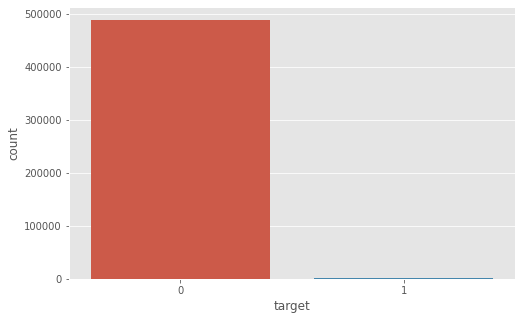

In [78]:
sns.countplot(aggregated_df['target'])

In [79]:
aggregated_df=aggregated_df.drop(columns=['UUID_3'	,'UUID_2'	,'UUID_1'])

In [80]:
aggregated_df=aggregated_df.dropna()

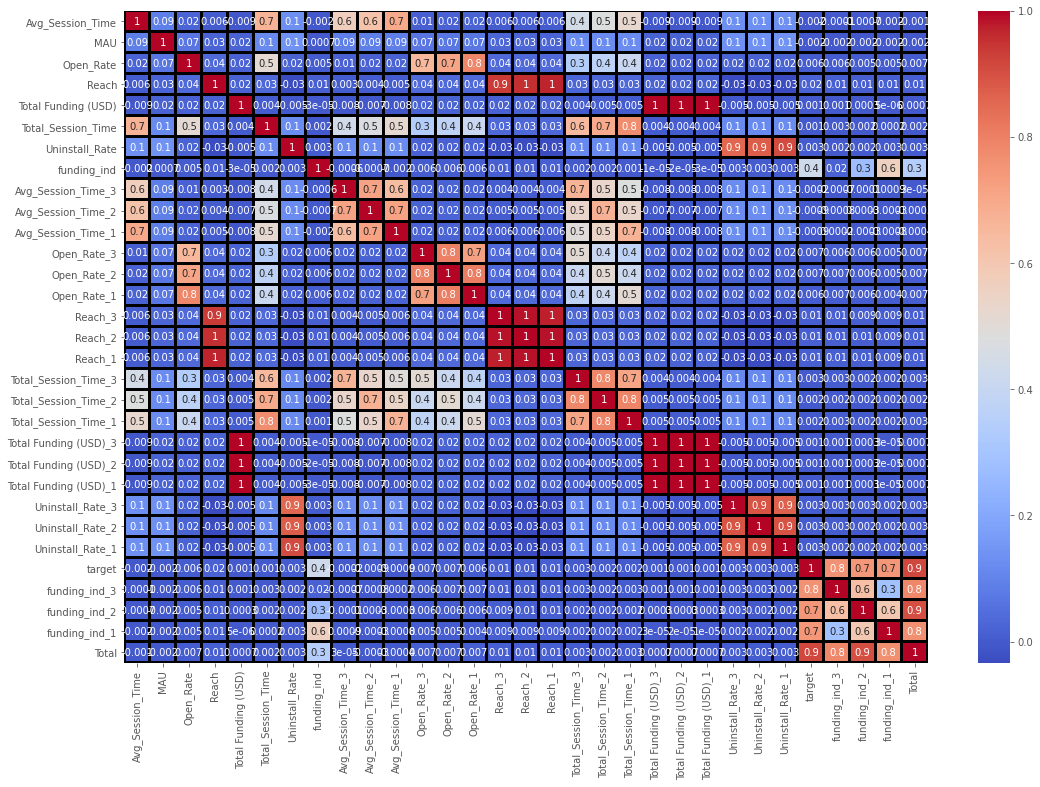

In [81]:
plt.figure(figsize=(18,12))
sns.heatmap(aggregated_df.corr(),annot=True,cmap='coolwarm',linewidths=2,fmt='.1g', linecolor='black')

In [82]:
List=[ 'Avg_Session_Time', 'Open_Rate', 'Reach','Total_Session_Time','Uninstall_Rate', 'funding_ind']



In [83]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
aggregated_df['Application Category'] = labelencoder.fit_transform(aggregated_df['Application Category'])


BaseLine 1model

In [84]:

sample_df=aggregated_df[aggregated_df['target']==0].sample(frac=0.05, random_state=1)


In [85]:
sample_df=pd.concat([sample_df,aggregated_df[aggregated_df['target']==1]])

In [86]:
X=sample_df.drop(columns=['funding_ind','funding_ind_1','funding_ind_2','funding_ind_3','month','target','Total','UUID'])

In [87]:
y=sample_df['target']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1)

In [89]:

prams={'bootstrap': True,
 'max_depth': 9,
 'min_samples_leaf': 45,
 'min_samples_split': 60,
 'n_estimators': 120}


In [90]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       from sklearn.ensemble import RandomForestClassifier

In [91]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()

rf = RandomForestClassifier( bootstrap= True,max_depth= 9,min_samples_leaf= 45,min_samples_split= 60,n_estimators= 120)



In [92]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=45, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score

In [94]:
y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.08%


In [95]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6115
           1       0.69      0.06      0.11       400

    accuracy                           0.94      6515
   macro avg       0.82      0.53      0.54      6515
weighted avg       0.93      0.94      0.92      6515



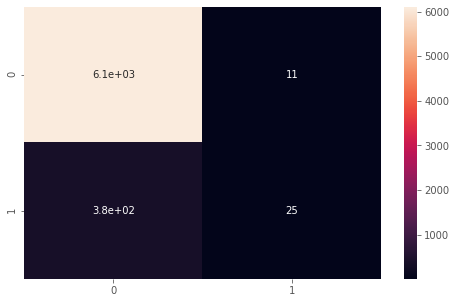

In [96]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [97]:
aggregated_df.to_pickle('/content/drive/MyDrive/Capstone-4/Final_df') # save


In [98]:
aggregated_df.shape

(489928, 34)

In [99]:
features=aggregated_df.drop(columns=['UUID', 'Avg_Session_Time', 'Open_Rate', 'Reach',
                            'Total_Session_Time','Uninstall_Rate','month','MAU','funding_ind_3',
                            'funding_ind_2', 'funding_ind_1','Total','funding_ind','target','Application Category',
 'Total Funding (USD)']).columns.to_list()


In [100]:
features

['Avg_Session_Time_3',
 'Avg_Session_Time_2',
 'Avg_Session_Time_1',
 'Open_Rate_3',
 'Open_Rate_2',
 'Open_Rate_1',
 'Reach_3',
 'Reach_2',
 'Reach_1',
 'Total_Session_Time_3',
 'Total_Session_Time_2',
 'Total_Session_Time_1',
 'Total Funding (USD)_3',
 'Total Funding (USD)_2',
 'Total Funding (USD)_1',
 'Uninstall_Rate_3',
 'Uninstall_Rate_2',
 'Uninstall_Rate_1']

In [101]:
features_rolling=pd.DataFrame()
for elem in [ 'Avg_Session_Time', 'Open_Rate', 'Reach','Total_Session_Time','Total Funding (USD)','Uninstall_Rate']:
    features_rolling=pd.concat([features_rolling,aggregated_df[[f'{elem}_1',f'{elem}_2',f'{elem}_3']].rolling(2,axis=1).mean()],axis=1)


In [102]:
features_rolling

,Avg_Session_Time_1,Avg_Session_Time_2,Avg_Session_Time_3,Open_Rate_1,Open_Rate_2,Open_Rate_3,Reach_1,Reach_2,Reach_3,Total_Session_Time_1,Total_Session_Time_2,Total_Session_Time_3,Total Funding (USD)_1,Total Funding (USD)_2,Total Funding (USD)_3,Uninstall_Rate_1,Uninstall_Rate_2,Uninstall_Rate_3
12,NaN,0.320713,0.233704,NaN,1.250000,1.750000,NaN,2.759674e-07,2.497145e-07,NaN,0.368263,0.376354,NaN,1410068.0,1410068.0,NaN,0.026207,0.026207
19,NaN,1.004617,1.209720,NaN,2.083333,4.750000,NaN,1.754878e-05,1.172581e-05,NaN,2.258471,9.015200,NaN,1410068.0,1410068.0,NaN,0.026207,0.026207
24,NaN,1.095826,1.250229,NaN,4.814397,4.534503,NaN,1.548089e-05,9.367419e-06,NaN,5.057652,5.399424,NaN,1410068.0,1410068.0,NaN,0.026207,0.026207
25,NaN,0.985049,1.095826,NaN,4.504193,4.814397,NaN,2.159437e-05,1.548089e-05,NaN,4.372700,5.057652,NaN,1410068.0,1410068.0,NaN,0.026207,0.026207
29,NaN,1.136549,1.167612,NaN,3.442779,3.640009,NaN,9.974937e-05,6.772607e-05,NaN,3.609729,3.975133,NaN,1410068.0,1410068.0,NaN,0.026207,0.026207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945172,NaN,1.405068,1.487590,NaN,1.096154,1.227733,NaN,2.612893e-04,2.616717e-04,NaN,1.564184,2.280563,NaN,47422120.0,47422120.0,NaN,0.040177,0.026242
945173,NaN,0.667483,1.405068,NaN,1.111111,1.096154,NaN,1.231152e-04,2.612893e-04,NaN,0.972779,1.564184,NaN,47422120.0,47422120.0,NaN,0.033152,0.040177
945174,NaN,1.187592,0.667483,NaN,1.224747,1.111111,NaN,5.027576e-06,1.231152e-04,NaN,1.520414,0.972779,NaN,47422120.0,47422120.0,NaN,0.048485,0.033152
945175,NaN,1.195445,1.187592,NaN,1.134470,1.224747,NaN,1.248137e-05,5.027576e-06,NaN,1.236694,1.520414,NaN,47422120.0,47422120.0,NaN,0.044444,0.048485


In [103]:
features_rolling['Avg_Session_Time_3']

12        0.233704
19        1.209720
24        1.250229
25        1.095826
29        1.167612
            ...   
945172    1.487590
945173    1.405068
945174    0.667483
945175    1.187592
945176    1.195445
Name: Avg_Session_Time_3, Length: 489928, dtype: float64

In [104]:
percentage_df=pd.DataFrame()
for elem in [ 'Avg_Session_Time', 'Open_Rate', 'Reach','Total_Session_Time','Total Funding (USD)','Uninstall_Rate']:
    features_rolling=features_rolling.drop(columns=[f'{elem}_1'])
    percentage_df[f'{elem}_Percentage_change'] = ((features_rolling[f'{elem}_3']-features_rolling[f'{elem}_2'])/features_rolling[f'{elem}_3'])*100


In [105]:
aggregated_df[percentage_df.columns.to_list()]=percentage_df.values

In [106]:
aggregated_df.drop

<bound method DataFrame.drop of                                             UUID  ...  Uninstall_Rate_Percentage_change
12      00017d2a013dc43f0e34de1be4beca443713ec80  ...                      1.323868e-14
19      0002b4fc148aa1ddb3b0d2c9ea94d527a51f7c45  ...                      1.323868e-14
24      00033006be474a18f422eb285da9b761023b09e1  ...                      1.323868e-14
25      00033006be474a18f422eb285da9b761023b09e1  ...                      1.323868e-14
29      0003f21a34dc47d4d2f0d645c2015eead98ff7de  ...                      1.323868e-14
...                                          ...  ...                               ...
945172  ffff67b9dfc65a5f1f146d681497a933998c2256  ...                     -5.310081e+01
945173  ffff67b9dfc65a5f1f146d681497a933998c2256  ...                      1.748720e+01
945174  ffff67b9dfc65a5f1f146d681497a933998c2256  ...                     -4.625229e+01
945175  ffff67b9dfc65a5f1f146d681497a933998c2256  ...                      8.333333e+00


In [107]:
redundan_List='Avg_Session_Time_3	Avg_Session_Time_2	Avg_Session_Time_1 Avg_Session_Time	MAU	Open_Rate	Reach	  	Total_Session_Time	Uninstall_Rate	Open_Rate_3	Open_Rate_2	Open_Rate_1	Reach_3	Reach_2	Reach_1	Total_Session_Time_3	Total_Session_Time_2	Total_Session_Time_1	Uninstall_Rate_3	Uninstall_Rate_2	Uninstall_Rate_1	target	funding_ind_3	funding_ind_2	funding_ind_1	Total'.split()

In [108]:
aggregated_df.drop(columns=redundan_List)

,UUID,Application Category,month,Total Funding (USD),funding_ind,Total Funding (USD)_3,Total Funding (USD)_2,Total Funding (USD)_1,Avg_Session_Time_Percentage_change,Open_Rate_Percentage_change,Reach_Percentage_change,Total_Session_Time_Percentage_change,Total Funding (USD)_Percentage_change,Uninstall_Rate_Percentage_change
12,00017d2a013dc43f0e34de1be4beca443713ec80,37,2020-03-01,1410068.0,0,1410068.0,1410068.0,1410068.0,-37.230116,28.571429,-10.513148,2.150014,0.0,1.323868e-14
19,0002b4fc148aa1ddb3b0d2c9ea94d527a51f7c45,17,2020-04-01,1410068.0,0,1410068.0,1410068.0,1410068.0,16.954583,56.140351,-49.659368,74.948189,0.0,1.323868e-14
24,00033006be474a18f422eb285da9b761023b09e1,17,2020-02-01,1410068.0,0,1410068.0,1410068.0,1410068.0,12.349968,-6.172544,-65.263158,6.329791,0.0,1.323868e-14
25,00033006be474a18f422eb285da9b761023b09e1,17,2020-03-01,1410068.0,0,1410068.0,1410068.0,1410068.0,10.108993,6.443261,-39.490446,13.542885,0.0,1.323868e-14
29,0003f21a34dc47d4d2f0d645c2015eead98ff7de,33,2020-03-01,1410068.0,0,1410068.0,1410068.0,1410068.0,2.660404,5.418402,-47.283562,9.192246,0.0,1.323868e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945172,ffff67b9dfc65a5f1f146d681497a933998c2256,7,2020-03-01,47422120.0,0,47422120.0,47422120.0,47422120.0,5.547363,10.717230,0.146172,31.412386,0.0,-5.310081e+01
945173,ffff67b9dfc65a5f1f146d681497a933998c2256,7,2020-04-01,47422120.0,0,47422120.0,47422120.0,47422120.0,52.494595,-1.364522,52.881659,37.809150,0.0,1.748720e+01
945174,ffff67b9dfc65a5f1f146d681497a933998c2256,7,2020-05-01,47422120.0,0,47422120.0,47422120.0,47422120.0,-77.920882,-10.227273,95.916364,-56.295892,0.0,-4.625229e+01
945175,ffff67b9dfc65a5f1f146d681497a933998c2256,7,2020-06-01,47422120.0,0,47422120.0,47422120.0,47422120.0,-0.661323,7.371134,-148.258136,18.660700,0.0,8.333333e+00


In [109]:
import pickle
path=open('/content/drive/MyDrive/Capstone-4/final_df1','rb')
new_df=pickle.load(path)

In [110]:
new_df=new_df['final_df1']

In [111]:
Non_funded_df=new_df[new_df.target==0].sample(frac=0.1, random_state=1)
funded_df=new_df[new_df.target==1]

In [112]:
funded_df=new_df[new_df.target==1]

For Visualising the Trends of data

In [113]:
visualisation_df=pd.concat([Non_funded_df,funded_df])

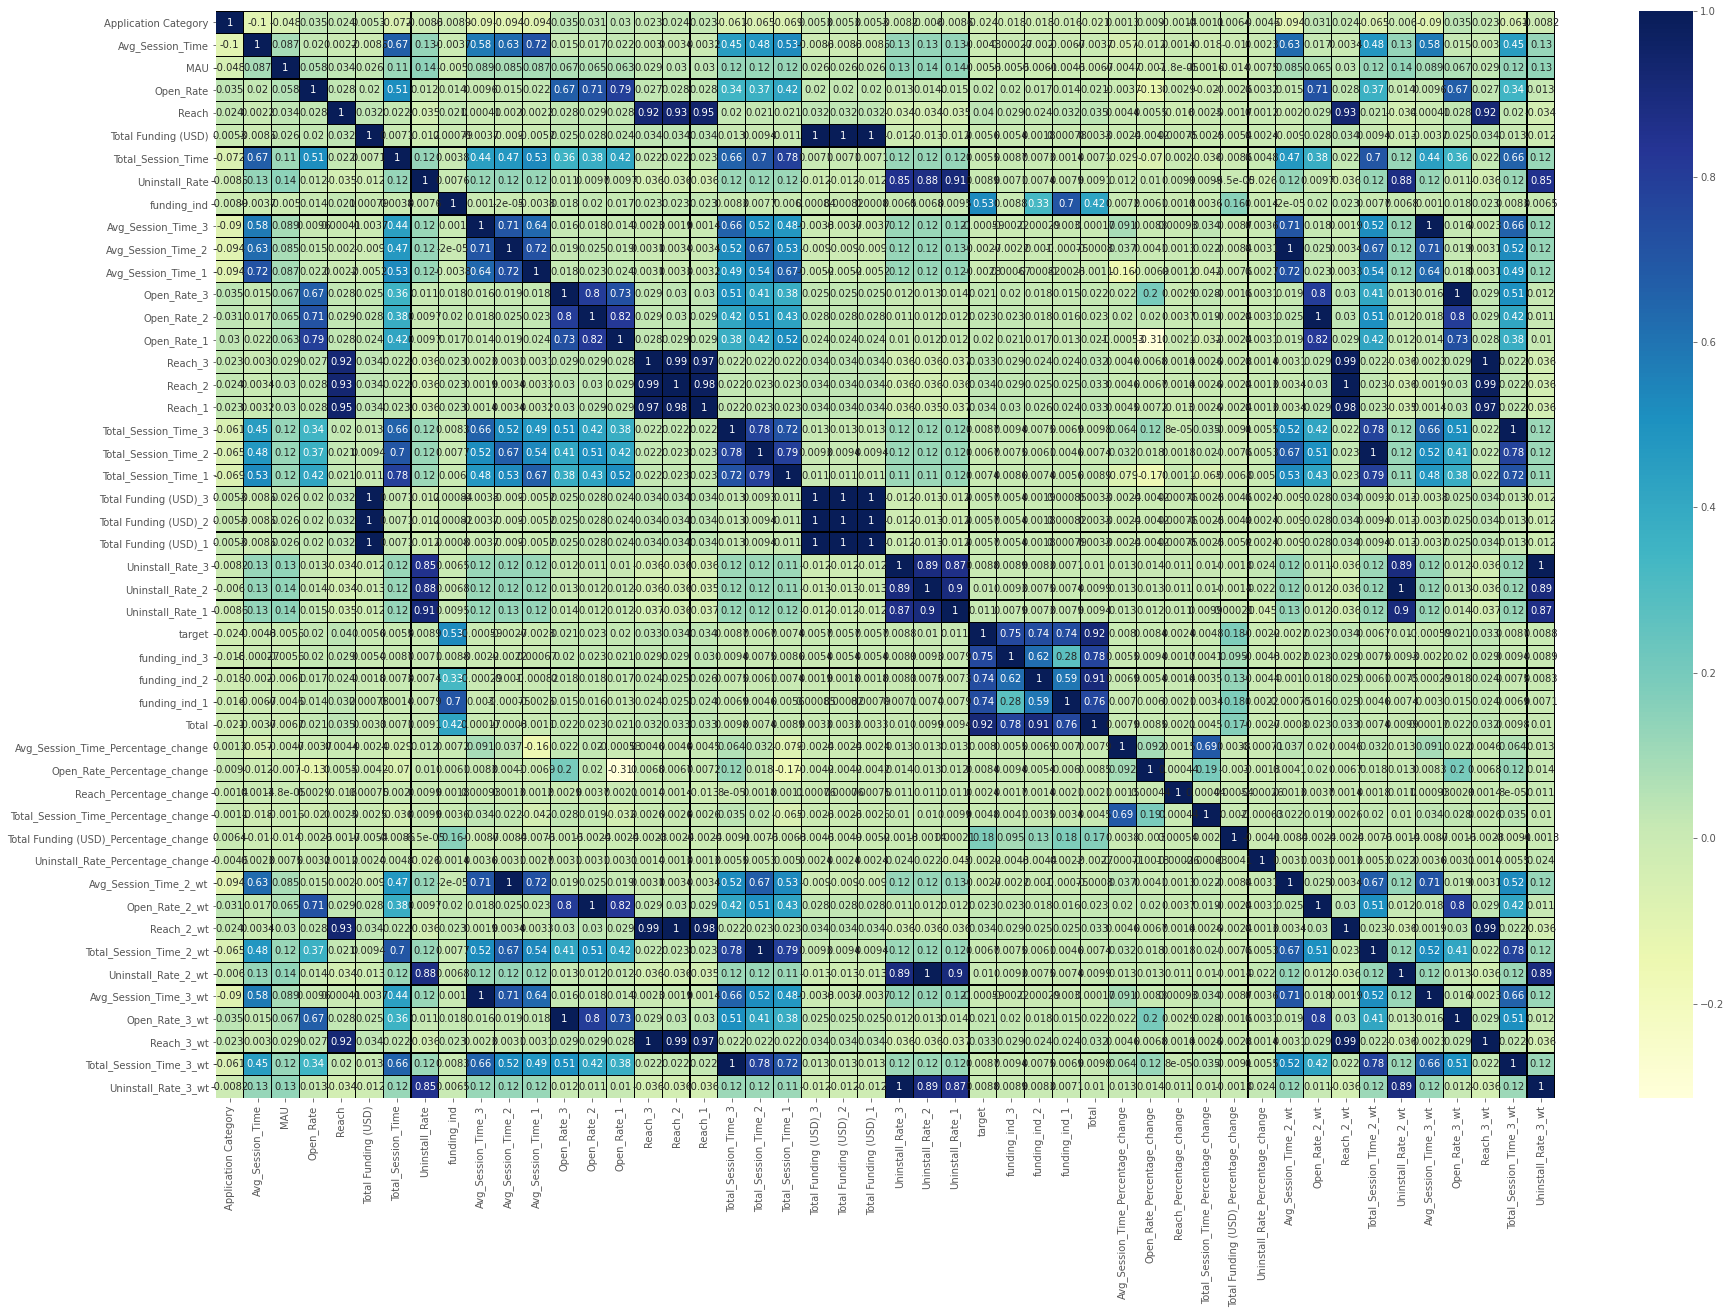

In [114]:
plt.figure(figsize=(30,20))
sns.heatmap(visualisation_df.corr(),annot=True,cmap="YlGnBu",linewidths=.2,linecolor='black')

Droping Redundant featurs

In [115]:
Redundant_features=['Avg_Session_Time_3',
       'Avg_Session_Time_2', 'Avg_Session_Time_1', 'Open_Rate_3',
       'Open_Rate_2', 'Open_Rate_1', 'Reach_3', 'Reach_2', 'Reach_1',
       'Total_Session_Time_3', 'Total_Session_Time_2', 'Total_Session_Time_1',
       'Total Funding (USD)_3', 'Total Funding (USD)_2',
       'Total Funding (USD)_1', 'Uninstall_Rate_3', 'Uninstall_Rate_2',
       'Uninstall_Rate_1',  'funding_ind_3', 'funding_ind_2',
       'funding_ind_1', 'Total',]

In [116]:
new_df=new_df.drop(columns=Redundant_features)

In [117]:
new_df=new_df.drop(columns="UUID")

In [119]:
non_funded_df=new_df[new_df.target==0].sample(frac=0.25, random_state=1)
funded_df=new_df[new_df.target==1]
df=pd.concat([non_funded_df,funded_df])

In [120]:
df=df.dropna()
 

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122450 entries, 109972 to 941582
Data columns (total 27 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Application Category                   122450 non-null  int64         
 1   month                                  122450 non-null  datetime64[ns]
 2   Avg_Session_Time                       122450 non-null  float64       
 3   MAU                                    122450 non-null  float64       
 4   Open_Rate                              122450 non-null  float64       
 5   Reach                                  122450 non-null  float64       
 6   Total Funding (USD)                    122450 non-null  float64       
 7   Total_Session_Time                     122450 non-null  float64       
 8   Uninstall_Rate                         122450 non-null  float64       
 9   funding_ind                            1224

In [122]:

labelencoder = LabelEncoder()
df['month'] = labelencoder.fit_transform(df['month'])


In [123]:
df.to_pickle('/content/drive/MyDrive/Capstone-4/Hadd_se_Jyaad_Final_df')

In [124]:
df=df.replace([np.inf, -np.inf], np.nan)
df=df.dropna()

In [125]:
X=df.drop(columns=['target']).dropna().values
y=df['target'].values

In [126]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1,stratify=y)

In [128]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [129]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [130]:
# fit predictor and target variable
x_smote,y_smote  = smote.fit_resample(X_train, y_train)
x_smote=pd.DataFrame(x_smote,columns=df.drop('target',axis=1).columns.to_list())
y_smote=pd.Series(y_smote)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [136]:
from xgboost import XGBClassifier

In [141]:
from sklearn.model_selection import RandomizedSearchCV
xgb= XGBClassifier(scale_pos_weight=90,objective = 'binary:logistic',
    nthread=4,
    eta = 0.1,
    num_boost_round = 80,
    max_depth = 5,
    subsample = 0.5,
    colsample_bytree = 1.0,
    silent = 1,
    )

parameters = {
    'n_estimators': [400,500,100],
    'weights' :[ 99, 75, ],
    'num_boost_round': [ 25],
    'max_depth': [ 4, 5],
    'colsample_bytree': [0.9, 1.0],
     'gpu_id': [0],
    'tree_method':['gpu_hist']
}


# define grid search
grid = RandomizedSearchCV(xgb, parameters, cv=2,n_jobs=-1, scoring='roc_auc',verbose=2)

In [142]:
XgbEval=grid.fit(x_smote, y_smote)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   55.0s finished


In [144]:
best_prams=XgbEval.best_estimator_

In [155]:
X_test=pd.DataFrame(X_test,columns=df.drop('target',axis=1).columns.to_list())

In [156]:
y_pred=best_prams.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[26566  3502]
 [  100   306]]
Accuracy Score 0.8818008794382096
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     30068
           1       0.08      0.75      0.15       406

    accuracy                           0.88     30474
   macro avg       0.54      0.82      0.54     30474
weighted avg       0.98      0.88      0.93     30474



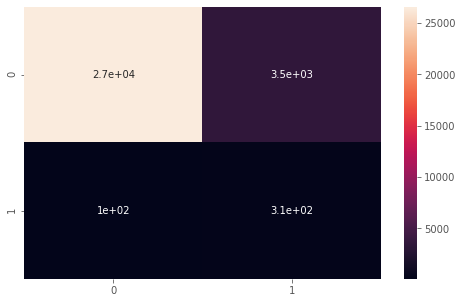

In [157]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [158]:
X_train=pd.DataFrame(X_train,columns=df.drop('target',axis=1).columns.to_list())

In [167]:
y_predTr=best_prams.predict(x_smote)
print(confusion_matrix(y_smote,y_predTr))
print("Accuracy Score {}".format(accuracy_score(y_smote,y_predTr)))
print(classification_report(y_smote,y_predTr))

[[80509  9695]
 [    0 90204]]
Accuracy Score 0.9462606979734823
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     90204
           1       0.90      1.00      0.95     90204

    accuracy                           0.95    180408
   macro avg       0.95      0.95      0.95    180408
weighted avg       0.95      0.95      0.95    180408



In [168]:
y_predTr=best_prams.predict(X_train)
print(confusion_matrix(y_train,y_predTr))
print("Accuracy Score {}".format(accuracy_score(y_train,y_predTr)))
print(classification_report(y_train,y_predTr))

[[80509  9695]
 [    0  1216]]
Accuracy Score 0.8939509954058193
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     90204
           1       0.11      1.00      0.20      1216

    accuracy                           0.89     91420
   macro avg       0.56      0.95      0.57     91420
weighted avg       0.99      0.89      0.93     91420



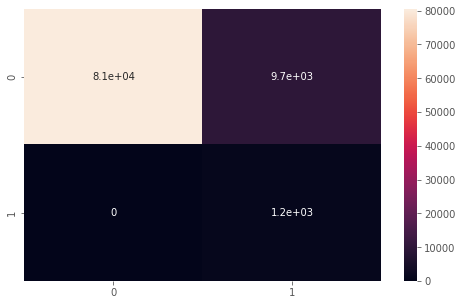

In [170]:
sns.heatmap(confusion_matrix(y_train,y_predTr),annot=True)

In [161]:
from sklearn.metrics import precision_recall_curve
y_scores = best_prams.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

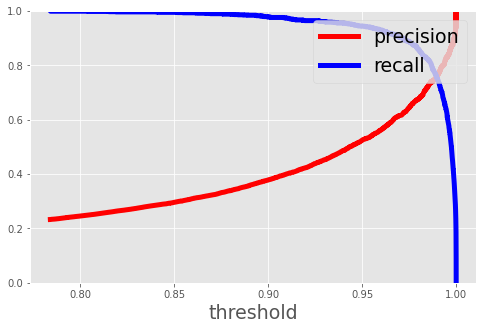

In [162]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 5))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [171]:
features = df.drop(columns=['target']).columns
importances = best_prams.feature_importances_
indices = np.argsort(importances)

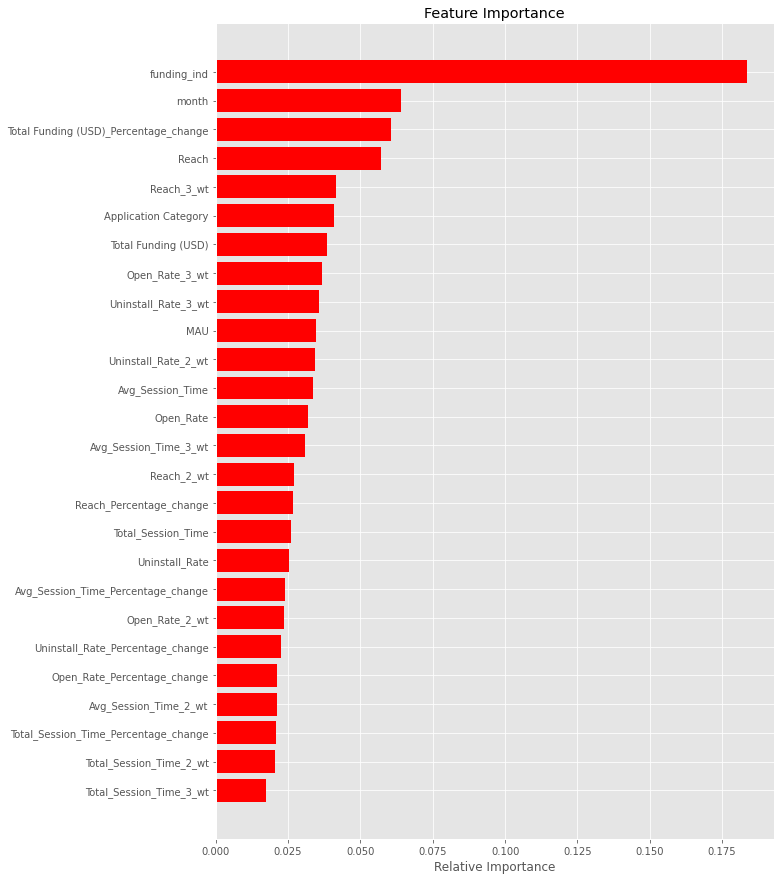

In [172]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgb= XGBClassifier(scale_pos_weight=90,objective = 'binary:logistic',
    nthread=4,
    eta = 0.1,
    num_boost_round = 80,
    max_depth = 5,
    subsample = 0.5,
    colsample_bytree = 1.0,
    silent = 1,
    )

parameters = {
    'n_estimators': [700,400,500,100],
    'weights' :[ 90,80,99 ],
    'num_boost_round': [ 25],
     "gamma"            : [ 0.1, 0.3, 0.4]
    'max_depth': [ 4 5,8],
    'colsample_bytree': [0.9, 1.0],
     'gpu_id': [0],
    'tree_method':['gpu_hist']
}


# define grid search
grid = RandomizedSearchCV(xgb, parameters, cv=2,n_jobs=-1, scoring='roc_auc',verbose=2)

In [ ]:
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

model = get_model()
fit = model.fit(train_ds, validation_data=val_ds, epochs=20)